In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

In [ ]:
city="husavik"
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}appid={weather_api_key}&q={city}"
city_weather = requests.get(city_url).json()
print(json.dumps(city_weather,indent = 4, sort_keys=True))
city_lat = city_weather['coord']["lat"]
city_lat
city_humidity = city_weather["main"]["temp_max"]
city_humidity
city_clouds = city_weather["clouds"]["all"]
city_clouds

In [ ]:
# Set the API base URL"
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        city_weather

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']["lat"]
        city_lng = city_weather['coord']["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [60]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sretensk,52.2453,117.7093,258.91,92,11,0.95,RU,1667403951
1,sembakung,3.8167,117.2500,296.82,98,100,0.84,ID,1667403951
2,ushuaia,-54.8000,-68.3000,283.94,66,20,2.57,AR,1667403843
3,flin flon,54.7682,-101.8650,269.06,86,100,5.14,CA,1667403952
4,nishihara,26.1842,127.7558,295.75,94,75,3.09,JP,1667403952


### Create the Scatter Plots Requested



#### Latitude Vs. Temperature

In [ ]:
# Build scatter plot for latitude vs. temperature
#city_data_df.plot.scatter(x = "Lat", y = "Max Temp", figsize = (10,7))
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp(C)")
plt.title("Latitude Vs Max Temperature(2022-11-2)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Latitude Vs Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],color="Red",edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity(2022-11-2)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Latitude Vs Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],color="Pink",edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness(2022-11-2)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Latitude Vs Wind Speed

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],color="Yellow",edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed(2022-11-2)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Compute Linear Regression for Each Relationship


In [99]:
# Define a function to create Linear Regression plots
## Add the linear regression equation and line to plot
# x_values = housing_data['RM']
# y_values = housing_data['MEDV']
def linregres(x_values, y_values):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


    regress_values = x_values * slope + intercept #List of predicted y values

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
    print(f"r value is {rvalue}")

    plt.scatter(x_values,y_values,edgecolors="black")

    plt.plot(x_values,regress_values,"r-",label=line_eq)
    
    plt.legend(loc="lower left")


    #plt.annotate(line_eq,(0,40),fontsize=15,color="red") #add in regression equation

    plt.show()


In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sretensk,52.2453,117.7093,258.91,92,11,0.95,RU,1667403951
1,sembakung,3.8167,117.2500,296.82,98,100,0.84,ID,1667403951
3,flin flon,54.7682,-101.8650,269.06,86,100,5.14,CA,1667403952
4,nishihara,26.1842,127.7558,295.75,94,75,3.09,JP,1667403952
8,half moon bay,37.4636,-122.4286,285.02,89,75,1.54,US,1667403954


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,283.94,66,20,2.57,AR,1667403843
5,bambous virieux,-20.3428,57.7575,297.16,78,40,4.63,MU,1667403953
6,hermanus,-34.4187,19.2345,297.48,51,3,7.47,ZA,1667403953
7,punta arenas,-53.1500,-70.9167,288.21,58,40,12.86,CL,1667403953
14,necochea,-38.5473,-58.7368,293.21,42,0,6.15,AR,1667403958


###  Temperature vs. Latitude Linear Regression Plot

r value is -0.8563472457061108


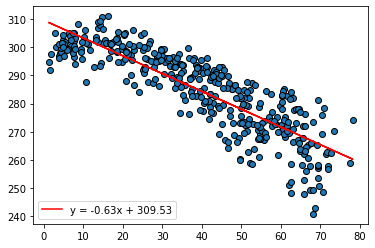

In [100]:
linregres(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])



r value is 0.602807868765959


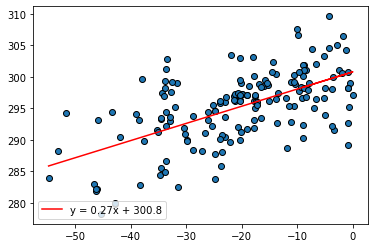

In [101]:
linregres(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])


### Humidity vs. Latitude Linear Regression Plot

r value is 0.3139459360466223


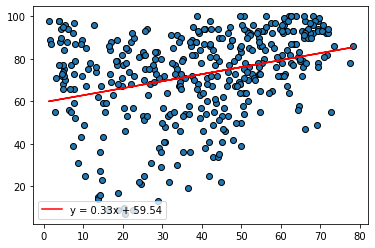

In [102]:
# Northern Hemisphere
linregres(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

r value is 0.13093687362543838


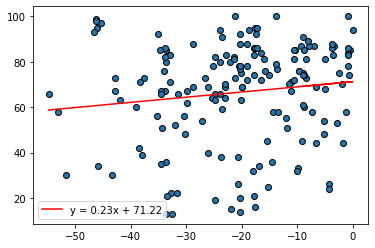

In [103]:
# Southern Hemisphere
linregres(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

### Cloudiness vs. Latitude Linear Regression Plot

r value is 0.23574091364326843


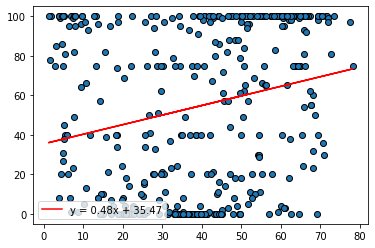

In [104]:
# Northern Hemisphere
linregres(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

r value is 0.33368186612477846


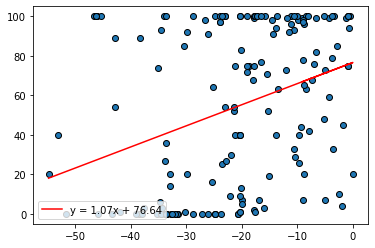

In [105]:
# Southern Hemisphere
linregres(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

### Wind Speed vs. Latitude Linear Regression Plot

r value is 0.26151658604911954


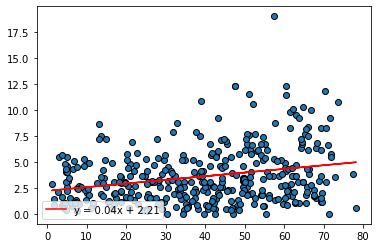

In [106]:
# Northern Hemisphere
linregres(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

r value is -0.24225362054346317


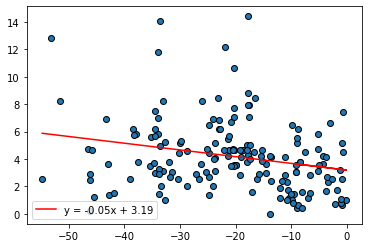

In [107]:
# Southern Hemisphere
linregres(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])